# Main script to extract data from OSM in Nairobi, Kenya     

<br>

Modules:  N/A             
Author: Cornelia Ilin           
Email:  <cilin@wisc.edu>                 
Date created: July 28, 2019
     
**Citations (online sources):**
1. Intro to GIS with Python
    - https://automating-gis-processes.github.io/2018/notebooks/L6/retrieve_osm_data.html#Download-and-visualize-OpenStreetMap-data-with-OSMnx
2. Retrieve data from OSM with the OSMnx package    
    - https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=gdf#submodules

**Citations (persons):**
1. N/A

**Preferred environment:** 
1. Easier to install with Anaconda
2. The following packages must be installed (follow specific order!):
    - https://automating-gis-processes.github.io/2018/course-info/Installing_Anacondas_GIS.html

### **Step 1**: import required packages

In [1]:
import osmnx as ox
import pandas as pd
import matplotlib.pyplot as plt


### **Step 2**: Specify location of interest 

In [2]:
place_name = "Nairobi, Kenya"
print("For this specific task we are interested to explore the street network in", place_name, end = ".")

For this specific task we are interested to explore the street network in Nairobi, Kenya.

### **Step 3**: Fetch the OSM street network for Nairobi, Kenya

Uses the OSMnx package in Python:

- **@module** osmnx.core <br>
- **@method** graph_from_place()
- **@param** network_type (options below):
- **@return** MultiDiGraph
        * drive: get drivable public streets (but not service roads)
        * drive_service: get drivable streets, including service roads
        * walk: get all streets and paths that pedestrians can use (this network type ignores one-way directionality)
        * bike: get all streets and paths that cyclists can use
        * all: download all non-private OSM streets and paths
        * all_private: download all OSM streets and paths, including private-access ones


In [3]:
graph = ox.graph_from_place(place_name, network_type = "all_private")

### **Step 4**: Plot the OSM street network for Nairobi, Kenya

Uses the OSMnx package in Python:
- **@module** osmnx.core <br> 
- **@method** plot_graph()

Terminology: 
- nodes = blue circles
- edges = grey lines
- ploted with matplotlib library

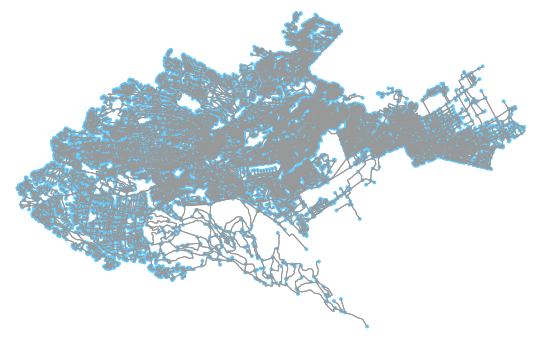

In [4]:
fig, ax = ox.plot_graph(graph) 

### **Step 6**: Retrieve data on edges
To do this we need to transform the street netork graph into a GeoDataFrame

Uses the OSMnx package in Python:

- **@module** osmnx.core <br> 
- **@method** graph_to_gdfs()
- **@return** GeoDataFrame

In [5]:
edges = ox.graph_to_gdfs(graph, nodes = False, edges = True)

In [6]:
# print the head of edges (first 2 rows)
edges.head(2)

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (36.8860871 -1.2527077, 36.8859764 ...",unclassified,NaN,0,NaN,31.673,NaN,Kamunde Road,False,163064443,NaN,NaN,NaN,6010044417,3776677049,NaN
1,NaN,NaN,"LINESTRING (36.8860871 -1.2527077, 36.8861581 ...",unclassified,NaN,0,NaN,164.837,NaN,Kamunde Road,False,163064443,NaN,NaN,NaN,6010044417,336031716,NaN


### **Step 7**: From edges, retrieve data on roads

Step 7.1: Keep only variables of interest: "highway", "geometry", "length", "osmid"

In [7]:
roads = edges[["highway", "geometry", "length", "osmid"]]
type(roads)

geopandas.geodataframe.GeoDataFrame

Step 7.2: Print head of roads: first 2 only

In [8]:
roads.head(2)
print("The roads data has", roads.shape[0], "observations", end = ".")

The roads data has 95673 observations.

Step 7.3: Print descriptive stats, count roads by type

In [9]:
roads['highway'].value_counts()

residential                       65503
unclassified                       7295
service                            7048
tertiary                           4379
path                               3589
secondary                          2981
footway                            2299
track                               606
primary                             545
trunk                               440
secondary_link                      177
trunk_link                          172
pedestrian                          122
cycleway                            108
tertiary_link                        83
[path, residential]                  74
primary_link                         54
[path, footway]                      48
[residential, service]               24
[residential, footway]               22
[footway, service]                   18
[track, footway]                     10
[path, service]                      10
[footway, unclassified]               8
[steps, footway]                      6


Step 7.4: Save roads data in .csv format

In [10]:
# all variables but geometry
df1 = roads[["highway", "length", "osmid"]]

# geometry variable 
# the bounds attribute returns a tuple of min and max coordinates on each axis for each shape)
df2 = roads[["geometry"]].bounds

# putting all these together
frames = [df1, df2]
roads_pd = pd.concat(frames, axis = 1, sort = False)

# print head and save as .csv file
print(roads_pd.head(2))
roads_pd.to_csv("roads.csv")

# drop df1, df2
del df1, df2

        highway   length      osmid       minx      miny       maxx      maxy
0  unclassified   31.673  163064443  36.885803 -1.252708  36.886087 -1.252693
1  unclassified  164.837  163064443  36.886087 -1.252708  36.887074 -1.251650


### **Step 8**: From amenities on OSM, retrieve data on schools

Uses the OSMnx package in Python:<br>

- **@module**: osmnx.pois <br>
- **@method**: pois_from_place()<br>
- **@return**: GeoDataFrame


Use the OSM amenities information:
- https://wiki.openstreetmap.org/wiki/Key:amenity#Education

Step 8.1: Amenities of interest: "schools"(includes primary, middle and secondary schools)

In [11]:
schools = ox.pois_from_place(place_name, amenities=['school'])

Step 8.3: Keep only variables of interest: "name", "geometry"

In [12]:
schools = schools[["name", "geometry"]]

Step 8.2: Print head of schools: first 2 only

In [13]:
schools.head(2)
print("The school data has", schools.shape[0], "observations", end = ".")

The school data has 1548 observations.

Step 8.3: Save schools data in .csv format

In [14]:
# all variables but geometry
df1 = schools[["name"]]

# geometry variable 
# the bounds attribute returns a tuple of min and max coordinates on each axis for each shape)
df2 = schools[["geometry"]].bounds

# putting all these together
frames = [df1, df2]
schools_pd = pd.concat(frames, axis = 1, sort = False)

# eliminate schools with N/A names
schools_pd = schools_pd.dropna()
print("The schools data has", schools_pd.shape[0], \
      "observations after removing schools with N/A names", end = ".")

# print head and save as .csv file
print(schools_pd.head(2))
schools_pd.to_csv("schools.csv")

# drop df1, df2
del df1, df2

The schools data has 1520 observations after removing schools with N/A names.                               name       minx      miny       maxx      maxy
30092225              Nairobi South  36.823562 -1.314213  36.823562 -1.314213
30092294  Nairobi Academy Secondary  36.753275 -1.340177  36.753275 -1.340177


### Step 9: Plot schools on map

Step 9.1. Plot the polygon that represents the area of Nairobi, Kenya <br>

Uses the OSMnx package in Python:

- **@module** osmnx.plot <br> 
- **@method** gdf_from_place()
- **@return** GeoDataFrame

In [15]:
area = ox.gdf_from_place(place_name) 

Step 9.2. Plot footprint and schools in Nairobi, Kenya

Text(12.25, 0.5, 'Latitude')

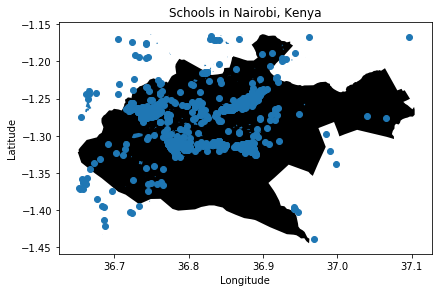

In [16]:
# plot footprint
ax = area.plot(facecolor = "black")

# plot schools
schools.plot(ax = ax, alpha = 1.0) 
plt.tight_layout()

# add title, x,y-labels to graph
plt.title("Schools in Nairobi, Kenya")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

### Step 10: Fetch the OSM power plants network for Nairobi, Kenya


Uses the OSMnx package in Python:<br>

- **@module** osmnx.core <br>
- **@method** graph_from_place()
- **@param** infrastructure (options below):
        * way["power"~"plant]
        * way["power"~"line"]
        * way["power"~"substation]
        * etc
- **@return** MultiDiGraph

More info on other infrastructures besides streets in OSMnx package:
- https://github.com/gboeing/osmnx-examples/blob/master/notebooks/16-work-with-other-infrastructures.ipynb


Use the OSM Power information:
- https://wiki.openstreetmap.org/wiki/Key:power

In [17]:
graph = ox.graph_from_place(place_name, network_type = "all_private",\
                            infrastructure='way["power"~"plant"]')

### **Step 11**: Plot the OSM power plants network for Nairobi, Kenya

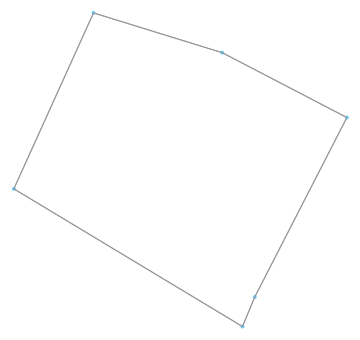

In [18]:
fig, ax = ox.plot_graph(graph)

### **Step 12**: Retrieve data on edges
To do this we need to transform the street netork graph into a GeoDataFrame

Uses the OSMnx package in Python:

- **@module** osmnx.core <br> 
- **@method** graph_to_gdfs()
- **@return** GeoDataFrame

In [19]:
edges = ox.graph_to_gdfs(graph, nodes = False, edges = True)
print("The roads data has", edges.shape[0], "observations", end = ".")

The roads data has 12 observations.

In [20]:
edges.head(12)

,geometry,key,landuse,length,name,oneway,osmid,u,v
0,"LINESTRING (36.8353845 -1.2868607, 36.8352107 ...",0,industrial,46.846,Kenya Power Substation,False,125302557,1392109336,1392109315
1,"LINESTRING (36.8353845 -1.2868607, 36.8356655 ...",0,industrial,32.695,Kenya Power Substation,False,125302557,1392109336,5496790553
2,"LINESTRING (36.8352107 -1.2872445, 36.8357096 ...",0,industrial,64.743,Kenya Power Substation,False,125302557,1392109315,1392109317
3,"LINESTRING (36.8352107 -1.2872445, 36.8353845 ...",0,industrial,46.846,Kenya Power Substation,False,125302557,1392109315,1392109336
4,"LINESTRING (36.8357096 -1.2875449, 36.8357364 ...",0,industrial,7.756,Kenya Power Substation,False,125302557,1392109317,1392109338
5,"LINESTRING (36.8357096 -1.2875449, 36.8352107 ...",0,industrial,64.743,Kenya Power Substation,False,125302557,1392109317,1392109315
6,"LINESTRING (36.8359374 -1.2870889, 36.8356655 ...",0,industrial,34.071,Kenya Power Substation,False,125302557,5496790552,5496790553
7,"LINESTRING (36.8359374 -1.2870889, 36.8357364 ...",0,industrial,48.942,Kenya Power Substation,False,125302557,5496790552,1392109338
8,"LINESTRING (36.8356655 -1.2869475, 36.8353845 ...",0,industrial,32.695,Kenya Power Substation,False,125302557,5496790553,1392109336
9,"LINESTRING (36.8356655 -1.2869475, 36.8359374 ...",0,industrial,34.071,Kenya Power Substation,False,125302557,5496790553,5496790552
